In [2]:
filename = '/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/eightbStudies/scripts/fully_res_filelist.txt'

In [3]:
with open(filename, 'r') as f:
    filelist = f.readlines()

In [4]:
filelist = filelist[0].split(' ')

In [5]:
filelist

['/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_450_MY_300_10M/fully_res_ntuple.root',
 '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_550_MY_300_4M/fully_res_ntuple.root',
 '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/fully_res_ntuple.root',
 '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_600_1M/fully_res_ntuple.root',
 '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_900_MY_300_2M/fully_res_ntuple.root',
 '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_600_MY_350_2M/fully_res_ntuple.root',
 '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_800_MY_350_2M/fully_res_ntuple.root',
 '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/

In [6]:
import uproot as up

In [7]:
trees = [up.open(fname + ':sixBtree') for fname in filelist]

In [8]:
def get_feature():
    

SyntaxError: invalid syntax (2901074411.py, line 1)

In [9]:
MX = [tree['X_m'].array() for tree in trees]
j1_pt = [tree['jet_pt'].array()[:,0] for tree in trees]

In [10]:
sig_MX = ak.concatenate(MX[:-1])

In [11]:
dataset_norm_abs_scales = [tree['dataset_norm_abs_scale'].array() for tree in trees]
sig_dataset_norm_abs_scale = ak.concatenate(dataset_norm_abs_scales[:-1])

In [12]:
bins = np.linspace(0, 4000, 41)

In [13]:
sig_weights = sig_dataset_norm_abs_scale/26
bkg_weights = dataset_norm_abs_scales[-1]

Text(0, 1, 'AU')

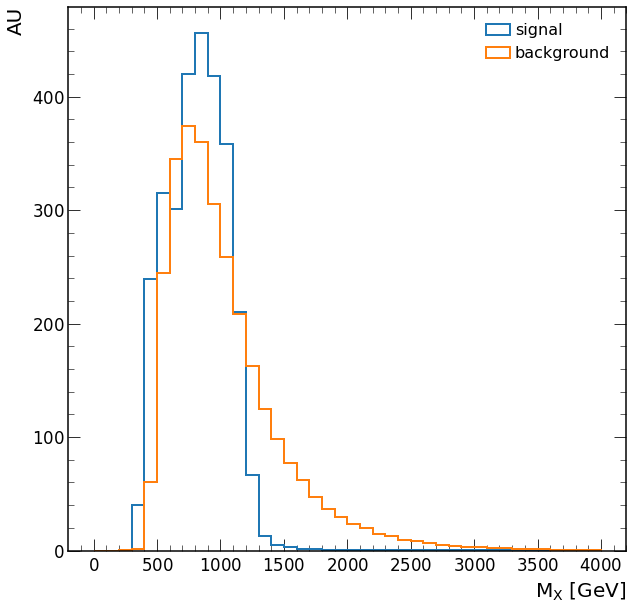

In [15]:
fig, ax = plt.subplots()

n_sig = Hist(sig_MX, weights=sig_weights, bins=bins, ax=ax, label='signal')
n_bkg = Hist(MX[-1], weights=bkg_weights, bins=bins, ax=ax, label='background')

ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel('AU')

# fig.savefig()

Text(0, 1, 'AU')

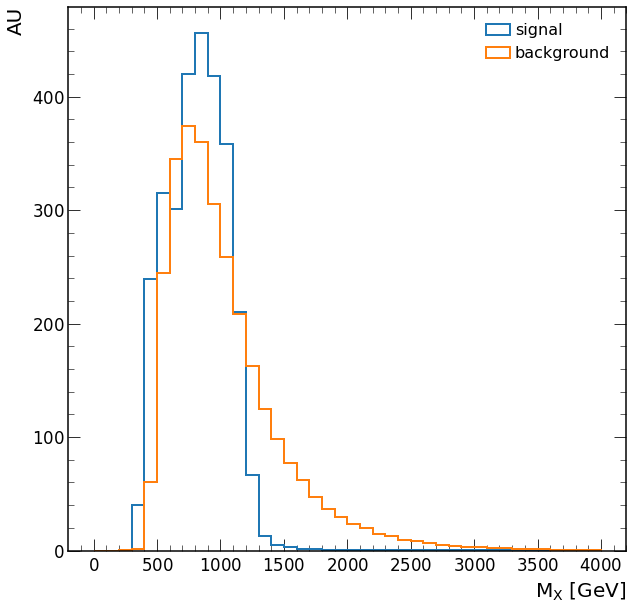

In [21]:
fig, ax = plt.subplots()

n_sig = Hist(sig_MX, weights=sig_weights, bins=bins, ax=ax, label='signal')
n_bkg = Hist(MX[-1], weights=bkg_weights, bins=bins, ax=ax, label='background')

ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel('AU')

# fig.savefig()

In [22]:
ratio = n_bkg / n_sig
m_bin = np.digitize(sig_MX, bins) - 1
m_bin = np.clip(m_bin, a_min=0, a_max=len(bins) - 2)
weights =  sig_weights * ratio[m_bin]

Text(0, 1, 'AU')

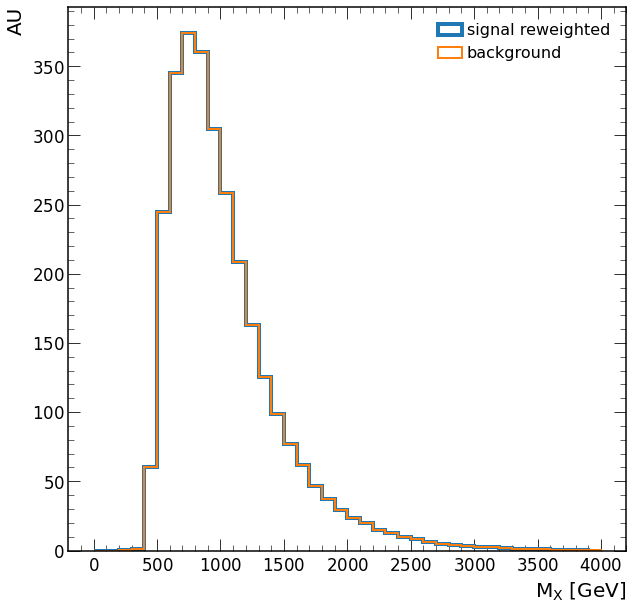

In [23]:
fig, ax = plt.subplots()

N_sig = Hist(sig_MX, weights=weights, bins=bins, ax=ax, label='signal reweighted', linewidth=4)
N_bkg = Hist(MX[-1], weights=bkg_weights, bins=bins, ax=ax, label='background')

ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel('AU')

Text(0, 1, 'AU')

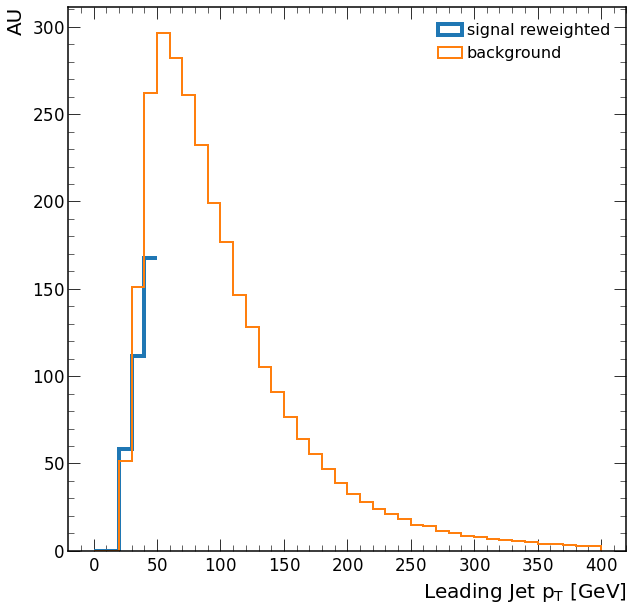

In [29]:
fig, ax = plt.subplots()

N_sig = Hist(ak.concatenate([tree['jet_pt'].array()[:,0] for tree in trees[:-1]]), weights=weights, bins=np.linspace(0,400,41), ax=ax, label='signal reweighted', linewidth=4)
N_bkg = Hist(trees[-1]['jet_pt'].array()[:,0], weights=bkg_weights, bins=np.linspace(0,400,41), ax=ax, label='background')

ax.set_xlabel(r'Leading Jet $p_T$ [GeV]')
ax.set_ylabel('AU')

Text(0, 1, 'AU')

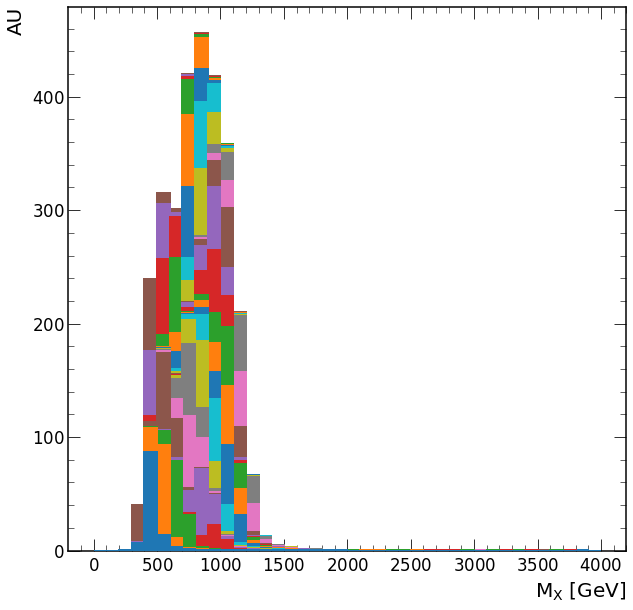

In [28]:
fig, ax = plt.subplots()
x = (bins[:-1] + bins[1:])/2
x = x * 0
zorder = 99

for tree in trees[:-1]:
    mx = tree['X_m'].array()
    w = tree['dataset_norm_abs_scale'].array() / 26
    n = Hist(mx, weights=w, bins=bins, ax=ax, fill=True, bottom=x, zorder=zorder)
    x += n
    zorder -= 1
# N_bkg = Hist(MX[-1], weights=bkg_weights, bins=bins, ax=ax, label='background')

ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel('AU')

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(20,10))

ax = axs[0]
n = Hist(ak.concatenate([tree['jet_pt'].array()[:,0] for tree in trees[:-1]]), bins=np.linspace)